<a href="https://colab.research.google.com/github/qmcnn/Data-Mining/blob/main/Project_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
visit = pd.read_csv('/content/drive/MyDrive/Project/ckdresearch2023/Visit.csv')
visit.shape

<ipython-input-3-8dbd214efeec>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  visit = pd.read_csv('/content/drive/MyDrive/Project/ckdresearch2023/Visit.csv')


(1340588, 11)

In [ ]:
visit.head()

,PatientUID,PatientvisitUID,Sex,Age,ENTY,NATNL,StartDTTM,EndDttm,Location,PricipalProblemCode,PricipalProblemName
0,19319,25325,หญิง,83,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN
1,83224,25327,ชาย,64,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN
2,160455,25336,ชาย,86,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN
3,181216,25338,หญิง,82,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN
4,568147,25357,ชาย,68,Out Patient,ไทย,2555-01-01 00:00:00.000,2557-11-26 23:58:59.730,NaN,NaN,NaN


In [75]:
visit.isnull().sum()

PatientUID                  0
PatientvisitUID             0
Sex                         0
Age                         0
ENTY                        2
NATNL                    1715
StartDTTM                   0
EndDttm                   538
Location               162181
PricipalProblemCode    416963
PricipalProblemName    416963
dtype: int64

In [ ]:
# กลุ่มและนับตาม 'PatientUID' โดยใช้ 'PatientvisitUID'
visit_df = visit.groupby('PatientUID').agg({
    'PatientvisitUID': 'count',
    'Sex': 'first',
    'Age': 'first',
    'ENTY': 'first',
    'NATNL': 'first',
    'Location': 'first',
    'PricipalProblemCode': 'first',
    'PricipalProblemName': 'first'
}).reset_index()
visit_df

,PatientUID,PatientvisitUID,Sex,Age,ENTY,NATNL,Location,PricipalProblemCode,PricipalProblemName
0,2299,83,หญิง,69,Out Patient,ไทย,หน่วยทะเบียนกลาง(Test พิเศษ)เวชศาสตร์ชันสูตร,1201005,Benign essential hypertension
1,2304,67,หญิง,52,Out Patient,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,370992007,Dyslipidemia
2,2312,83,หญิง,54,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,202855006,Lateral epicondylitis
3,2354,64,ชาย,60,Out Patient,ไทย,ตรวจสุขภาพ (คลินิก)-D1901,Z027,Issue of medical certificate
4,2362,88,ชาย,54,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,53059001,Replacement of mitral valve
...,...,...,...,...,...,...,...,...,...
22570,3421578,6,ชาย,66,Out Patient,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,I635,Cerebral infarction due to unspecified occlusi...
22571,3426284,4,หญิง,78,Out Patient,ลาว,เวชปฏิบัติทั่วไป (OPD)-D03,431857002,Chronic kidney disease stage 4
22572,3431501,4,หญิง,51,Out Patient,ไทย,ศัลยกรรม กว.-D06,K805,Calculus of bile duct without cholangitis or c...
22573,3432056,14,หญิง,73,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,285604008,Metastasis to lung of unknown primary


In [ ]:
visit_df.isnull().sum()

PatientUID               0
PatientvisitUID          0
Sex                      0
Age                      0
ENTY                     0
NATNL                  111
Location                 0
PricipalProblemCode    256
PricipalProblemName    256
dtype: int64

In [ ]:
#แทนค่า missing ในคอลัมน์NATNL,PricipalProblemCode,PricipalProblemName ด้วยค่า mode
#ถ้าไม่มีค่า mode ให้แทนค่านั้นด้วย None
modes = visit_df[['NATNL', 'PricipalProblemCode', 'PricipalProblemName']].mode().iloc[0]
visit_df['NATNL'] = visit_df['NATNL'].fillna(modes['NATNL'] if not pd.isna(modes['NATNL']) else None)
visit_df['PricipalProblemCode'] = visit_df['PricipalProblemCode'].fillna(modes['PricipalProblemCode'] if not pd.isna(modes['PricipalProblemCode']) else None)
visit_df['PricipalProblemName'] = visit_df['PricipalProblemName'].fillna(modes['PricipalProblemName'] if not pd.isna(modes['PricipalProblemName']) else None)
visit_df


,PatientUID,PatientvisitUID,Sex,Age,ENTY,NATNL,Location,PricipalProblemCode,PricipalProblemName
0,2299,83,หญิง,69,Out Patient,ไทย,หน่วยทะเบียนกลาง(Test พิเศษ)เวชศาสตร์ชันสูตร,1201005,Benign essential hypertension
1,2304,67,หญิง,52,Out Patient,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,370992007,Dyslipidemia
2,2312,83,หญิง,54,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,202855006,Lateral epicondylitis
3,2354,64,ชาย,60,Out Patient,ไทย,ตรวจสุขภาพ (คลินิก)-D1901,Z027,Issue of medical certificate
4,2362,88,ชาย,54,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,53059001,Replacement of mitral valve
...,...,...,...,...,...,...,...,...,...
22570,3421578,6,ชาย,66,Out Patient,ไทย,เวชปฏิบัติทั่วไป (OPD)-D03,I635,Cerebral infarction due to unspecified occlusi...
22571,3426284,4,หญิง,78,Out Patient,ลาว,เวชปฏิบัติทั่วไป (OPD)-D03,431857002,Chronic kidney disease stage 4
22572,3431501,4,หญิง,51,Out Patient,ไทย,ศัลยกรรม กว.-D06,K805,Calculus of bile duct without cholangitis or c...
22573,3432056,14,หญิง,73,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,285604008,Metastasis to lung of unknown primary


In [ ]:
visit_df.shape

(22575, 9)

In [ ]:
visit_df.isnull().sum()

PatientUID             0
PatientvisitUID        0
Sex                    0
Age                    0
ENTY                   0
NATNL                  0
Location               0
PricipalProblemCode    0
PricipalProblemName    0
dtype: int64

In [ ]:
visit_df.describe()

,PatientUID,PatientvisitUID,Age
count,2.257500e+04,22575.000000,22575.000000
mean,1.233214e+06,59.383743,62.878184
std,9.348240e+05,59.180989,12.323428
min,2.299000e+03,2.000000,9.000000
25%,4.871035e+05,23.000000,56.000000
50%,1.061787e+06,46.000000,64.000000
75%,1.843714e+06,77.000000,71.000000
max,3.437526e+06,1169.000000,98.000000


In [ ]:
visit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22575 entries, 0 to 22574
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PatientUID           22575 non-null  int64 
 1   PatientvisitUID      22575 non-null  int64 
 2   Sex                  22575 non-null  object
 3   Age                  22575 non-null  int64 
 4   ENTY                 22575 non-null  object
 5   NATNL                22575 non-null  object
 6   Location             22575 non-null  object
 7   PricipalProblemCode  22575 non-null  object
 8   PricipalProblemName  22575 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.6+ MB


In [ ]:
visit_df.describe(include=np.object)

<ipython-input-12-48f1d76658c5>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  visit_df.describe(include=np.object)


,Sex,ENTY,NATNL,Location,PricipalProblemCode,PricipalProblemName
count,22575,22575,22575,22575,22575,22575
unique,2,3,32,175,4227,4007
top,ชาย,Out Patient,ไทย,บูรณาการนอกเวลา (คลินิก)-OD191,1201005,Benign essential hypertension
freq,12042,20333,22304,3843,959,959


# ผลการสำรวจข้อมูลทางสถิติ และการสรุปด้วยตารางและรูปภาพ

### **ชื่อโรคที่มีคนเป็นมาที่สุด**


In [ ]:
ProblemName = visit_df['PricipalProblemName'].value_counts().head(5)
ProblemName

Benign essential hypertension       959
Type 2 diabetes mellitus            672
General medical examination         562
End stage renal disease             454
Essential (primary) hypertension    417
Name: PricipalProblemName, dtype: int64

In [ ]:
top_ProblemName = visit_df.groupby(['PricipalProblemName'])[['PatientUID']].count().sort_values(by='PatientUID',ascending=False).head(5)
top_ProblemName

,PatientUID
PricipalProblemName,
Benign essential hypertension,959
Type 2 diabetes mellitus,672
General medical examination,562
End stage renal disease,454
Essential (primary) hypertension,417


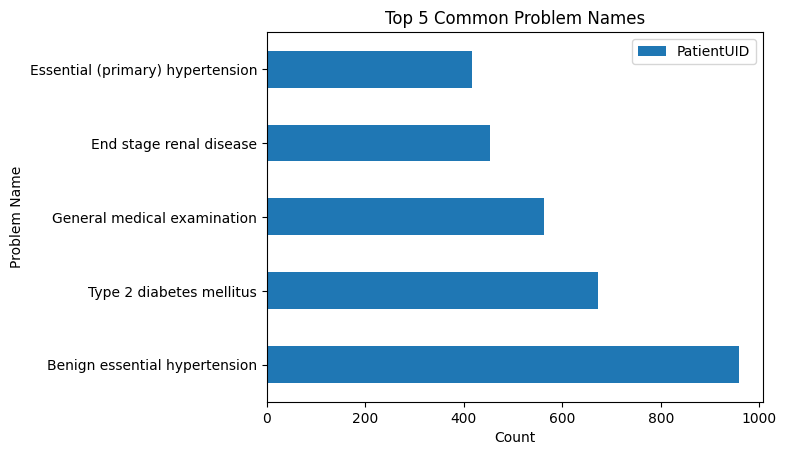

In [ ]:
top_ProblemName.plot.barh()
plt.xlabel('Count')
plt.ylabel('Problem Name')
plt.title('Top 5 Common Problem Names')
plt.show()

### **สัญชาติที่มีการเข้ารักษามากทีสุด**

In [ ]:
nationalities = visit_df.groupby(['NATNL'])[['PatientUID']].count().sort_values(by='PatientUID',ascending=False)
nationalities

,PatientUID
NATNL,
ไทย,22304
ลาว,114
อื่นๆ,24
"บริติช (อังกฤษ, สก็อตแลนด์)",23
อเมริกัน,19
ไม่ระบุ,16
เยอรมัน,10
ออสเตรเลีย,8
เวียดนาม,5


### **ประเภทของผู้ป่วยที่มาเข้ารับการรักษา**

In [ ]:
ENTY = visit_df.groupby(['ENTY'])[['PatientUID']].count().sort_values(by='PatientUID',ascending=False)
ENTY

,PatientUID
ENTY,
Out Patient,20333
InPatient,1329
E,913


<Axes: xlabel='ENTY'>

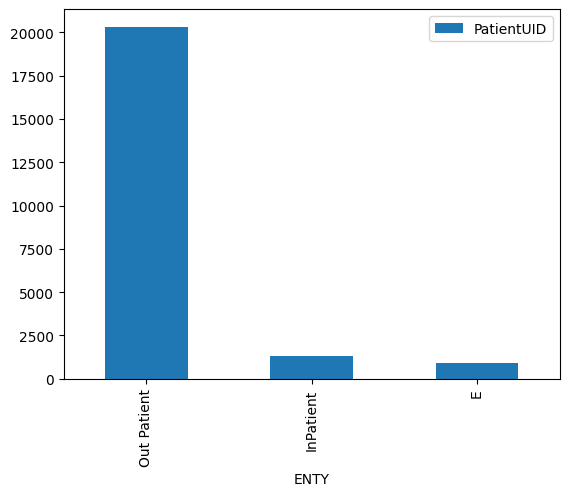

In [ ]:
ENTY.plot.bar()

**เพศชายที่เป็นโรคBenign essential hypertension ในช่วงอายุ 0-12, 13-20, 21-59 และ60 ปีขึ้นไป**

In [42]:
# กรองข้อมูลโรค Benign essential hypertension
hypertension_df = visit_df[visit_df['PricipalProblemName'] == 'Benign essential hypertension']

# สร้างฟังก์ชันสำหรับกลุ่มอายุ
def age_group(age):
    if age <= 12:
        return '0-12'
    elif age <= 20:
        return '13-20'
    elif age <= 59:
        return '21-59'
    else:
        return '60+'

# เพิ่มคอลัมน์ Age Group โดยใช้ฟังก์ชัน age_group
hypertension_df['Age Group'] = hypertension_df['Age'].apply(age_group)

# กรองและนับจำนวนผู้ชายในแต่ละกลุ่มอายุ
female_hypertension_by_age = hypertension_df[hypertension_df['Sex'] == 'ชาย'].groupby('Age Group')['Sex'].count()

# แสดงผลลัพธ์
print(female_hypertension_by_age)


Age Group
21-59    124
60+      341
Name: Sex, dtype: int64


<ipython-input-42-cb1900e03676>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hypertension_df['Age Group'] = hypertension_df['Age'].apply(age_group)


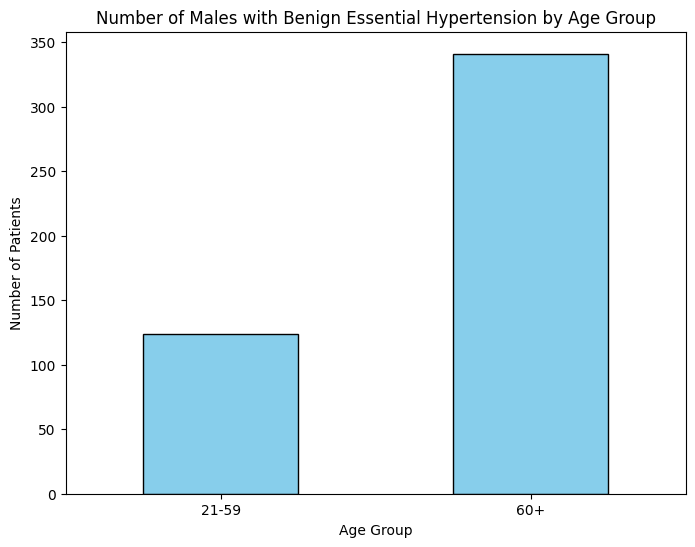

In [43]:
# สร้างแผนภูมิแท่งเปรียบเทียบจำนวนผูชายที่เป็นโรค Benign essential hypertension ในแต่ละกลุ่มอายุ
plt.figure(figsize=(8, 6))
female_hypertension_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Males with Benign Essential Hypertension by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # ไม่หมุนข้อความบนแกน x
plt.show()

### **ช่วงอายุใดในเพศชายที่มีการเข้ารับรักษามากสุด**

In [55]:
age = visit_df[visit_df['Sex'] == 'ชาย'].groupby('Age')['Sex'].count().sort_values(ascending=False)
age

Age
61    440
63    428
60    416
65    412
59    409
     ... 
14      3
98      2
13      2
93      1
9       1
Name: Sex, Length: 86, dtype: int64

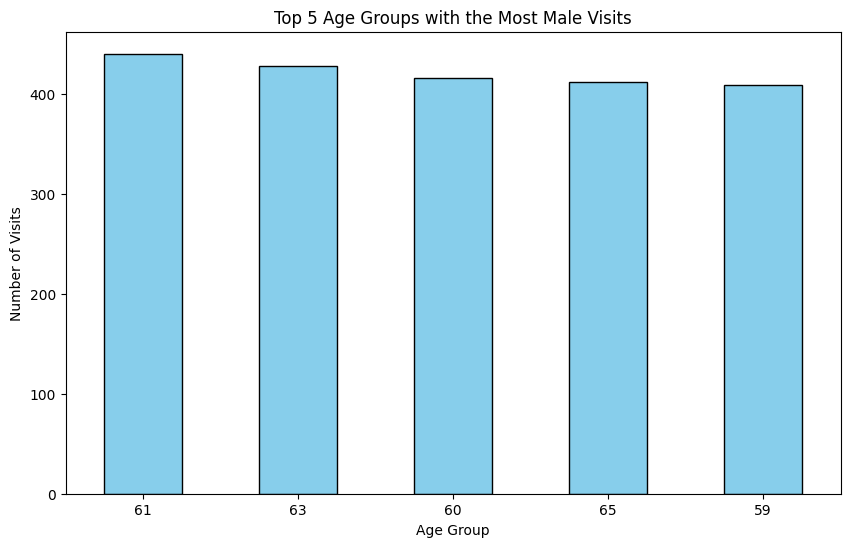

In [56]:
# เลือกเฉพาะ 5 กลุ่มอายุแรก
top_5_male_visits_by_age = age.head(5)

# สร้างแผนภูมิแท่งเปรียบเทียบ
plt.figure(figsize=(10, 6))
top_5_male_visits_by_age.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Age Groups with the Most Male Visits')
plt.xlabel('Age Group')
plt.ylabel('Number of Visits')
plt.xticks(rotation=0)
plt.show()


### **อายุใดในสัญชาติไทยที่เข้ารับการรักษามากที่สุดและเป็นเพศใด**

In [61]:
 import matplotlib.pyplot as plt

# กรองข้อมูลเฉพาะสัญชาติไทย
thai_patients = visit_df[visit_df['NATNL'] == 'ไทย']

# หาจำนวนการเข้ารับการรักษาในแต่ละกลุ่มอายุ
age_group_visits = thai_patients.groupby('Age Group')['Age'].count().sort_values(ascending=False)

# เลือกเฉพาะ 5 กลุ่มอายุแรก
top_5_age_group_visits = age_group_visits.head(5)

# สร้างแผนภูมิแท่งเปรียบเทียบ
plt.figure(figsize=(10, 6))
top_5_age_group_visits.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Age Groups with the Most Visits among Thai Nationals')
plt.xlabel('Age Group')
plt.ylabel('Number of Visits')
plt.xticks(rotation=0)
plt.show()


KeyError: ignored

In [66]:
# กรองข้อมูลเฉพาะสัญชาติไทย
thai_patients = visit_df[visit_df['NATNL'] == 'ไทย']

# หากลุ่มอายุที่มีจำนวนการเข้ารับการรักษามากที่สุด
most_visited_age = thai_patients.groupby('Age')['Sex'].value_counts()
most_visited_age_max = most_visited_age.idxmax()
most_visited_age_max

(61, 'ชาย')

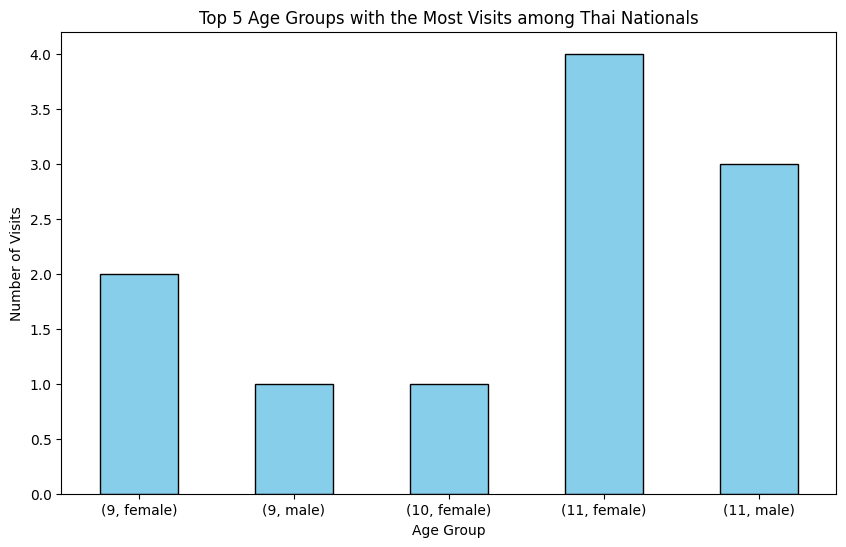

In [73]:
# เลือกเฉพาะ 5 กลุ่มอายุแรก
top_5_age_group_visits = most_visited_age.head(5)

# แทนค่าเพศเป็น male และ female
top_5_age_group_visits.index = top_5_age_group_visits.index.set_levels(['male', 'female'], level=1)

# สร้างแผนภูมิแท่งเปรียบเทียบ
plt.figure(figsize=(10, 6))
top_5_age_group_visits.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Age Groups with the Most Visits among Thai Nationals')
plt.xlabel('Age Group')
plt.ylabel('Number of Visits')
plt.xticks(rotation=0)
plt.show()


### **แนวโน้มการเข้ารักษาแต่ละปี**

In [ ]:
T_PM25 = AQI_com[['Datetime','PM2.5_SubIndex']]
plt.figure(figsize=(10, 6))
plt.plot(T_PM25['Datetime'], T_PM25['PM2.5_SubIndex'], marker='o', linestyle='-')
plt.title('PM2.5 Over Time')
plt.xlabel('Datetime')
plt.ylabel('PM2.5_SubIndex')
plt.grid(True)
plt.show()

In [77]:
# แปลงคอลัมน์ StartDTTM และ EndDttm เป็นรูปแบบของวันที่
visit['StartDTTM'] = pd.to_datetime(visit['StartDTTM'])
visit['EndDttm'] = pd.to_datetime(visit['EndDttm'])

# สร้างคอลัมน์ใหม่ "Year" เพื่อเก็บข้อมูลปีที่เข้ารักษา
visit['Year'] = visit['StartDTTM'].dt.year

# นับจำนวนการเข้ารักษาในแต่ละปี
visits_per_year = visit['Year'].value_counts().sort_index()

# สร้างแผนภูมิเส้นแนวนอน
plt.figure(figsize=(10, 6))
visits_per_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Trend of Visits per Year')
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.xticks(visits_per_year.index)
plt.grid(True)
plt.show()

OutOfBoundsDatetime: ignored

In [ ]:
import matplotlib.pyplot as plt

# แปลงคอลัมน์ VisitDate เป็นรูปแบบ datetime
visit_df['VisitDate'] = pd.to_datetime(visit_df['VisitDate'])

# สร้างคอลัมน์ใหม่ Year เพื่อแยกปีจาก VisitDate
visit_df['Year'] = visit_df['VisitDate'].dt.year

# นับจำนวนการเข้ารักษาในแต่ละปี
visits_by_year = visit_df['Year'].value_counts().sort_index()

# สร้างแผนภูมิเส้นแสดงแนวโน้มการเข้ารักษาในแต่ละปี
plt.figure(figsize=(12, 6))
visits_by_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Trend of Visits by Year')
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.show()
